# Twitter Analysis - WeRateDogs

# Table of Contents

- [Introduction](#intro) 
- [Data Wrangling](#DataW)
    - [Gathering Data](#GatherD)
    - [Assesing Data](#AssessD)
    - [Cleaning Data](#CleanD)
- [Storing, Analyzing and Visualization](#SAV)

<a id = 'intro'></a>
## Introduction

The dataset is the tweet archive of Twitter_user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

<a id = 'DataW'></a>
## Data Wrangling 

<a id = 'GatherD'></a>
### Gathering Data

##### Enhanced Twitter Archive
1.  Download the file manually : twitter_archive_enhanced.csv

##### image_predictions
1.  This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

##### tweet_json
1.  Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 

In [1]:
#import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests
import tweepy
import seaborn as sns
from IPython.display import Image
sns.set()

#### 1. WeRateDog Twitter Archive

Download the file "twitter_archive_enhanced.csv" manually.

In [2]:
#read csv file

df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. tweet image prediction 

This file "image_predictions.tsv" is hosted on Udacity's servers and should be downloaded programmatically using the Requests library.

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open ('image-predictions.tsv', mode='wb') as file: 
    file.write(response.content)

#read tsv file
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Twitter API 

a. retrive data required (at minimum) from API 
- each tweet's retweet count
- each tweet's favourite ('like') count
- any additional data

b. using the "tweetID" in the "twitter_archieve_enhanced.csv"
- query the Twitter API for each tweet's JSON data using Python's "Tweepy" library
- store each tweet's entire set of JSON data in a file called "tweet_json.txt", each tweet's JSON data should be written to its own line. 
- read this .txt file by line into a pandas DataFrame (min columns = tweetID, retweet count and favorite count)



Call the api.

In [4]:
query = False

if query:
    consumer_key = '...'
    consumer_secret = '...'
    access_token = '...'
    access_secret = '...'

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth,  
                    wait_on_rate_limit= True,
                    wait_on_rate_limit_notify= True)

Set tweet_id same as the tweet_id in our existing df_twitter_archive.

In [5]:
tweet_id = df_twitter_archive.tweet_id

Write the retrieving tweets into tweet_json.txt.

In [6]:
query = False

if query:
    failed_id = []

    with open('tweet_json.txt', 'w', encoding='UTF-8') as file: 
        for id_ in tweet_id: 
            try: 
                tweet =  api.get_status(id_)
                tweet = tweet._json
                json.dump(tweet, file)
                file.write('\n')
            except: 
                print('failed retrieving tweet with id', id_)
                failed_id.append(id_)

Open the file tweet_json.txt which we have saved earlier. Then, retrieve the information needed and store it in a dataframe.

In [7]:
df = []

with open ('tweet_json.txt') as f: 
    for line in f: 
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        retweeted = tweet['retweeted']
        df.append({'tweet_id' : tweet_id, 
                  'retweet_count' : retweet_count, 
                  'favorite_count' : favorite_count, 
                  'retweeted' : retweeted})
        

In [8]:
df_tweet = pd.DataFrame(df, columns=["tweet_id",'retweet_count', 'favorite_count', 'retweeted'])

In [9]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,7319,34858,False
1,892177421306343426,5466,30198,False
2,891815181378084864,3609,22728,False
3,891689557279858688,7502,38107,False
4,891327558926688256,8064,36374,False


<a id = 'AssessD'></a>
### Assessing Data
Detect and document at least 8 quality issues and 2 tidiness issues

#### Visual Assessment

In [10]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
df_tweet

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,7319,34858,False
1,892177421306343426,5466,30198,False
2,891815181378084864,3609,22728,False
3,891689557279858688,7502,38107,False
4,891327558926688256,8064,36374,False
...,...,...,...,...
2326,666049248165822465,38,92,False
2327,666044226329800704,121,257,False
2328,666033412701032449,39,105,False
2329,666029285002620928,41,117,False


#### Programmatically Assessment

In [13]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
df_twitter_archive.duplicated().sum()

0

In [16]:
df_twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Clifford      1
Sparky        1
Wesley        1
Marty         1
Joshwa        1
Name: name, Length: 957, dtype: int64

In [17]:
df_twitter_archive.groupby('name').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
name,,,,,,,,,,,,,,,,
Abby,2,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2
Ace,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Acro,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Adele,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Aiden,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
such,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
the,8,0,0,8,8,8,0,0,0,8,8,8,8,8,8,8
this,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1


In [18]:
df_twitter_archive.retweeted_status_id.value_counts()

6.816941e+17    1
8.688804e+17    1
8.071068e+17    1
8.099208e+17    1
7.932865e+17    1
               ..
7.902771e+17    1
6.671522e+17    1
7.638376e+17    1
8.083449e+17    1
6.675487e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [19]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [20]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [22]:
df_twitter_archive.query('rating_numerator > 14')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [23]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
df_image_predictions.duplicated().sum()

0

In [27]:
df_image_predictions.jpg_url.duplicated().sum()

66

In [28]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,7319,34858,False
1,892177421306343426,5466,30198,False
2,891815181378084864,3609,22728,False
3,891689557279858688,7502,38107,False
4,891327558926688256,8064,36374,False


In [29]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
 3   retweeted       2331 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.0 KB


In [30]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2574.897040,7278.625483
std,6.823170e+16,4355.159305,11305.456247
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,522.500000,1259.500000
50%,7.182469e+17,1200.000000,3153.000000
75%,7.986692e+17,2982.000000,8898.000000
max,8.924206e+17,73872.000000,149726.000000


In [31]:
df_tweet.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
retweeted         0
dtype: int64

In [32]:
df_tweet.duplicated().sum()

0

In [33]:
df_tweet.retweeted.value_counts()

False    2331
Name: retweeted, dtype: int64

### Quality 

#### df_twitter_archive
1. A few columns with NaN values (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp & expanded_urls) 
2. Name with (a, such, the, this, unacceptable and very), which is invalid for a dog name. 
3. tweet_id data type should be str. 
4. Rating denominator should be 10 only. 
5. Rating numerator has maximum value of 1776, which is invalid for this case. The rating numerator should be kept from 0-14 only. 
6. Rating denominator and rating numerator to be changed to float type for later calculation. 


#### df_image_predictions
7. tweet_id data_type should be str
8. To change the values in columns p1, p2, p3 to lowercase. 

#### df_tweet
9. tweet_id data_type should be str

### Tidiness

#### df_twitter_archive 
1. Combine table doggo, floofer, pupper and puppo to one column only. 
2. Timestamp to be seperated to year, month and day. 

#### df_image_predictions
3. To drop the columns p1,p2,p3 and respective conf. columns. Thereafter, create new columns dog_type and confidence level.

<a id = 'CleanD'></a>
### Cleaning Data

In [34]:
#create a copy 

df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_clean = df_tweet.copy()

##### 1. df_twitter_archive - Keep the original tweets only. Based on the info, we found that there are 181 retweets. I'll delete these 181 records and keep the original tweets only. 

Code

In [35]:
retweets = list(df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].isnull()==False].index)
df_twitter_archive_clean.drop(axis=0, index=retweets, inplace=True)

Test

If there is no output below, the cleaning is success. 

In [36]:
for i in retweets: 
    if i in list(df_twitter_archive_clean.index): 
        print('Found a retweet')

##### 2. df_twitter_archive - Delete the columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id', 'expanded_urls', 'source') that will not be used for analysis later.

Code

In [37]:
df_twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id', 'expanded_urls', 'source'], axis = 1, inplace=True)

Test

In [38]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   doggo               2175 non-null   object
 7   floofer             2175 non-null   object
 8   pupper              2175 non-null   object
 9   puppo               2175 non-null   object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


##### 3. df_twitter_archive - Replace invalid dog name with none (a, such, the, this, unacceptable and very).

Code

In [39]:
mask = df_twitter_archive_clean.name.str.islower()
column_name = 'name'
df_twitter_archive_clean.loc[mask, column_name] = 'None'

Test

In [40]:
df_twitter_archive_clean.name.value_counts()

None       784
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Dido         1
Gilbert      1
Tayzie       1
Joshwa       1
Kody         1
Name: name, Length: 931, dtype: int64

In [41]:
df_twitter_archive_clean.groupby('name').count()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
name,,,,,,,,,
Abby,2,2,2,2,2,2,2,2,2
Ace,1,1,1,1,1,1,1,1,1
Acro,1,1,1,1,1,1,1,1,1
Adele,1,1,1,1,1,1,1,1,1
Aiden,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Ziva,1,1,1,1,1,1,1,1,1
Zoe,1,1,1,1,1,1,1,1,1
Zoey,3,3,3,3,3,3,3,3,3


##### 4. df_twitter_archive - Change tweet_id data type to str. 

Code

In [42]:
df_twitter_archive_clean.tweet_id = df_twitter_archive_clean.tweet_id.astype(str)

Test

In [43]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   doggo               2175 non-null   object
 7   floofer             2175 non-null   object
 8   pupper              2175 non-null   object
 9   puppo               2175 non-null   object
dtypes: int64(2), object(8)
memory usage: 186.9+ KB


##### 5. df_twitter_archive - Drop the rows where the rating denominator is not 10. 

Code

In [44]:
denominator_not_ten = list(df_twitter_archive_clean.query('rating_denominator != 10').index)
df_twitter_archive_clean.drop(index = denominator_not_ten, inplace=True)

Test

In [45]:
df_twitter_archive_clean.query('rating_denominator != 10').index

Int64Index([], dtype='int64')

##### 6. df_twitter_archive - Rating numerator has maximum value of 1776, which is invalid for this case.  As mentioned in the introduction earlier, (The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent."), I will keep the range to (0-14). 

##### Thus, the rating numerator not within the range will be dropped.

In [46]:
df_twitter_archive_clean.describe()

,rating_numerator,rating_denominator
count,2153.000000,2153.0
mean,12.250813,10.0
std,42.679419,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


In [47]:
df_twitter_archive_clean.rating_numerator.value_counts()

12      500
10      442
11      425
13      307
9       155
8        98
7        53
14       43
5        36
6        32
3        19
4        15
2         9
1         7
0         2
420       2
15        1
27        1
17        1
1776      1
666       1
182       1
26        1
75        1
Name: rating_numerator, dtype: int64

Code

In [48]:
numerator_larger_than_14 = list(df_twitter_archive_clean.query('rating_numerator > 14').index)
df_twitter_archive_clean.drop(index = numerator_larger_than_14, inplace=True)

Test

In [49]:
df_twitter_archive_clean.describe()

,rating_numerator,rating_denominator
count,2143.000000,2143.0
mean,10.616892,10.0
std,2.193964,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,14.000000,10.0


In [50]:
df_twitter_archive_clean.rating_numerator.value_counts()

12    500
10    442
11    425
13    307
9     155
8      98
7      53
14     43
5      36
6      32
3      19
4      15
2       9
1       7
0       2
Name: rating_numerator, dtype: int64

##### 7. df_twitter_archive - Change the data type to float for rating_numerator and rating_denominator 

Code

In [51]:
df_twitter_archive_clean.rating_denominator = df_twitter_archive_clean.rating_denominator.astype(float)
df_twitter_archive_clean.rating_numerator = df_twitter_archive_clean.rating_numerator.astype(float)

Test

In [52]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2143 non-null   object 
 1   timestamp           2143 non-null   object 
 2   text                2143 non-null   object 
 3   rating_numerator    2143 non-null   float64
 4   rating_denominator  2143 non-null   float64
 5   name                2143 non-null   object 
 6   doggo               2143 non-null   object 
 7   floofer             2143 non-null   object 
 8   pupper              2143 non-null   object 
 9   puppo               2143 non-null   object 
dtypes: float64(2), object(8)
memory usage: 184.2+ KB


##### 8. df_twitter_archive - Change the 'timestamp' data type to datetime and split it by 'year', 'month', 'day'

Code

In [53]:
#change the data type to datetime
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean['timestamp'])

#split the timestamp into year, month and day
df_twitter_archive_clean['year'] = df_twitter_archive_clean['timestamp'].dt.year
df_twitter_archive_clean['month'] = df_twitter_archive_clean['timestamp'].dt.month
df_twitter_archive_clean['day'] = df_twitter_archive_clean['timestamp'].dt.day

#drop column timestamp
df_twitter_archive_clean.drop('timestamp', axis = 1, inplace=True)

Test

In [54]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2143 non-null   object 
 1   text                2143 non-null   object 
 2   rating_numerator    2143 non-null   float64
 3   rating_denominator  2143 non-null   float64
 4   name                2143 non-null   object 
 5   doggo               2143 non-null   object 
 6   floofer             2143 non-null   object 
 7   pupper              2143 non-null   object 
 8   puppo               2143 non-null   object 
 9   year                2143 non-null   int64  
 10  month               2143 non-null   int64  
 11  day                 2143 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 217.6+ KB


##### 9. df_twitter_archive - Combine table doggo, floofer, pupper and puppo to one column 'dog_stage' only.

In [55]:
df_twitter_archive_clean.doggo.replace('None', '', inplace=True)
df_twitter_archive_clean.floofer.replace('None', '', inplace=True)
df_twitter_archive_clean.pupper.replace('None', '', inplace=True)
df_twitter_archive_clean.puppo.replace('None', '', inplace=True)

In [56]:
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean.doggo + df_twitter_archive_clean.floofer + df_twitter_archive_clean.pupper + df_twitter_archive_clean.puppo

In [57]:
df_twitter_archive_clean['dog_stage'].value_counts()

                1800
pupper           223
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [58]:
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [59]:
df_twitter_archive_clean['dog_stage'].value_counts()

                  1800
pupper             223
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [60]:
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == ' ', 'dog_stage'] = np.nan

In [61]:
df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

Test

In [62]:
df_twitter_archive_clean.dog_stage.value_counts()

                  1800
pupper             223
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

##### 10. df_image_predictions - Change the tweet_id data type to str.

Code

In [63]:
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype(str)

test

In [64]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### 11. df_image_predictions - To change the values in columns p1, p2, p3 to lowercase. 

Code

In [65]:
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.lower()
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.lower()
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.lower()

Test

In [66]:
for i in df_image_predictions_clean.p1: 
    if i.islower()==False: 
        print('not lowercase')

In [67]:
for i in df_image_predictions_clean.p2: 
    if i.islower()==False: 
        print('not lowercase')

In [68]:
for i in df_image_predictions_clean.p3: 
    if i.islower()==False: 
        print('not lowercase')

##### 12. df_image_predictions - To drop the columns p1,p2,p3 and respective conf. columns. Thereafter, create new columns dog_type and confidence level.

Code

In [69]:
dog_breed = []
confidence_level = []

def image(df_image_predictions_clean): 
    if df_image_predictions_clean['p1_dog'] == True: 
        dog_breed.append(df_image_predictions_clean['p1'])
        confidence_level.append(df_image_predictions_clean['p1_conf'])
    elif df_image_predictions_clean['p2_dog'] == True: 
        dog_breed.append(df_image_predictions_clean['p2'])
        confidence_level.append(df_image_predictions_clean['p2_conf'])
    elif df_image_predictions_clean['p3_dog'] == True:
        dog_breed.append(df_image_predictions_clean['p3'])
        confidence_level.append(df_image_predictions_clean['p3_conf'])
    else: 
        dog_breed.append('error')
        confidence_level.append('error')
        
df_image_predictions_clean.apply(image, axis = 1)


#create columns 'dog_breed' & 'confidence_level'
df_image_predictions_clean['dog_breed'] = dog_breed
df_image_predictions_clean['confidence_level'] = confidence_level

In [70]:
df_image_predictions_clean = df_image_predictions_clean[df_image_predictions_clean['dog_breed'] != 'error']

Test

In [71]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1751 non-null   object 
 1   jpg_url           1751 non-null   object 
 2   img_num           1751 non-null   int64  
 3   p1                1751 non-null   object 
 4   p1_conf           1751 non-null   float64
 5   p1_dog            1751 non-null   bool   
 6   p2                1751 non-null   object 
 7   p2_conf           1751 non-null   float64
 8   p2_dog            1751 non-null   bool   
 9   p3                1751 non-null   object 
 10  p3_conf           1751 non-null   float64
 11  p3_dog            1751 non-null   bool   
 12  dog_breed         1751 non-null   object 
 13  confidence_level  1751 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 169.3+ KB


In [72]:
df_image_predictions_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").index

Int64Index([], dtype='int64')

In [73]:
df_image_predictions_clean.drop(['p1', 'p1_conf', 'p1_dog', 
                                 'p2', 'p2_conf', 'p2_dog', 
                                 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

In [74]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1751 non-null   object
 1   jpg_url           1751 non-null   object
 2   img_num           1751 non-null   int64 
 3   dog_breed         1751 non-null   object
 4   confidence_level  1751 non-null   object
dtypes: int64(1), object(4)
memory usage: 82.1+ KB


##### 13. df_tweet - To change the tweet_id data type to str

Code

In [75]:
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)

Test

In [76]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
 3   retweeted       2331 non-null   bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 57.0+ KB


<a id = 'SAV'></a>
## Storing, Analyzing and Visualizing

Store the clean DataFrame in a csv file with the main one named "twitter_archive_master.csv"

##### Combine 3 dfs into one df

In [77]:
df_twitter1 = pd.merge(df_twitter_archive_clean, df_image_predictions_clean,
                      how='left', on = ['tweet_id'])

df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

In [78]:
df_master = pd.merge(df_twitter1, df_tweet_clean, 
                    how='left', on=['tweet_id'])
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1666 non-null   object 
 1   text                1666 non-null   object 
 2   rating_numerator    1666 non-null   float64
 3   rating_denominator  1666 non-null   float64
 4   name                1666 non-null   object 
 5   year                1666 non-null   int64  
 6   month               1666 non-null   int64  
 7   day                 1666 non-null   int64  
 8   dog_stage           1666 non-null   object 
 9   jpg_url             1666 non-null   object 
 10  img_num             1666 non-null   float64
 11  dog_breed           1666 non-null   object 
 12  confidence_level    1666 non-null   object 
 13  retweet_count       1659 non-null   float64
 14  favorite_count      1659 non-null   float64
 15  retweeted           1659 non-null   object 
dtypes: flo

In [79]:
df_master.head()

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,dog_stage,jpg_url,img_num,dog_breed,confidence_level,retweet_count,favorite_count,retweeted
0,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,5466.0,30198.0,False
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,3609.0,22728.0,False
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017,7,30,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever,0.168086,7502.0,38107.0,False
3,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017,7,29,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,8064.0,36374.0,False
4,891087950875897856,Here we have a majestic great white breaching ...,13.0,10.0,None,2017,7,29,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,chesapeake_bay_retriever,0.425595,2704.0,18357.0,False


##### Save to csv file

In [80]:
df_master.to_csv('twitter_archive_master.csv', index=False)

##### Read csv file

In [81]:
df = pd.read_csv('twitter_archive_master.csv')

In [82]:
df.head()

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,dog_stage,jpg_url,img_num,dog_breed,confidence_level,retweet_count,favorite_count,retweeted
0,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,5466.0,30198.0,False
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,3609.0,22728.0,False
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017,7,30,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever,0.168086,7502.0,38107.0,False
3,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017,7,29,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,8064.0,36374.0,False
4,891087950875897856,Here we have a majestic great white breaching ...,13.0,10.0,None,2017,7,29,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,chesapeake_bay_retriever,0.425595,2704.0,18357.0,False


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1666 non-null   int64  
 1   text                1666 non-null   object 
 2   rating_numerator    1666 non-null   float64
 3   rating_denominator  1666 non-null   float64
 4   name                1666 non-null   object 
 5   year                1666 non-null   int64  
 6   month               1666 non-null   int64  
 7   day                 1666 non-null   int64  
 8   dog_stage           259 non-null    object 
 9   jpg_url             1666 non-null   object 
 10  img_num             1666 non-null   float64
 11  dog_breed           1666 non-null   object 
 12  confidence_level    1666 non-null   float64
 13  retweet_count       1659 non-null   float64
 14  favorite_count      1659 non-null   float64
 15  retweeted           1659 non-null   object 
dtypes: flo

In [84]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,year,month,day,img_num,confidence_level,retweet_count,favorite_count
count,1.666000e+03,1666.000000,1666.0,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1659.000000,1659.000000
mean,7.394893e+17,10.833733,10.0,2015.885354,7.024610,15.934574,1.216086,0.549417,2377.501507,8275.891501
std,6.820255e+16,1.783633,0.0,0.697099,4.101123,8.841340,0.576939,0.299267,4330.899447,12187.284684
min,6.660209e+17,0.000000,10.0,2015.000000,1.000000,1.000000,1.000000,0.000010,11.000000,69.000000
25%,6.773183e+17,10.000000,10.0,2015.000000,3.000000,8.000000,1.000000,0.302321,537.000000,1864.500000
50%,7.135861e+17,11.000000,10.0,2016.000000,7.000000,16.000000,1.000000,0.550604,1182.000000,3867.000000
75%,7.932223e+17,12.000000,10.0,2016.000000,11.000000,24.000000,1.000000,0.821449,2702.500000,10240.000000
max,8.921774e+17,14.000000,10.0,2017.000000,12.000000,31.000000,4.000000,0.999956,73872.000000,149726.000000


### Insights and Visualisation

##### Correlation Heatmap

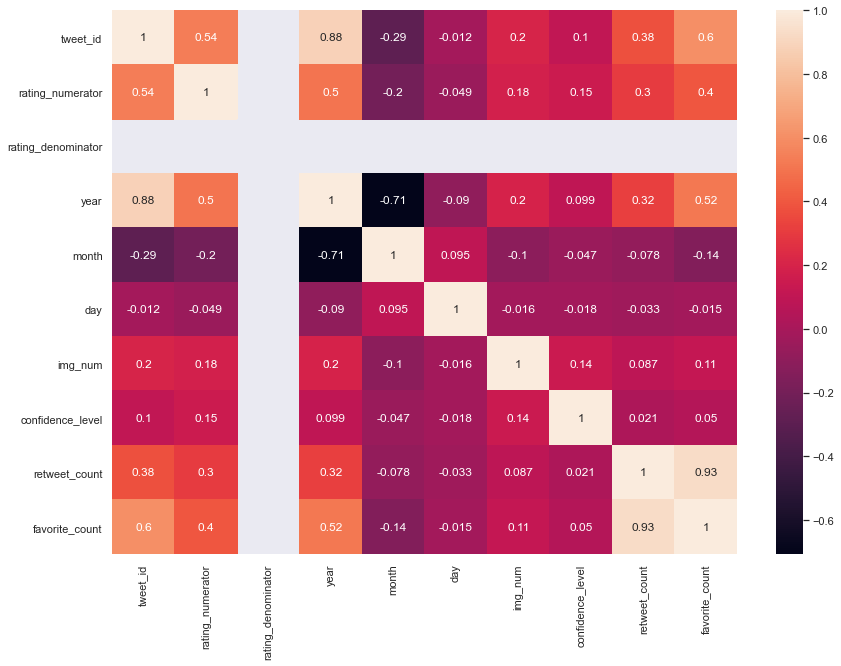

<Figure size 432x288 with 0 Axes>

In [85]:
corrMatrix = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()
plt.savefig('heatmap.png');

From above heatmap, we can see that retweet_count and favorite_count is highly postive correlated (0.93).

##### Histogram

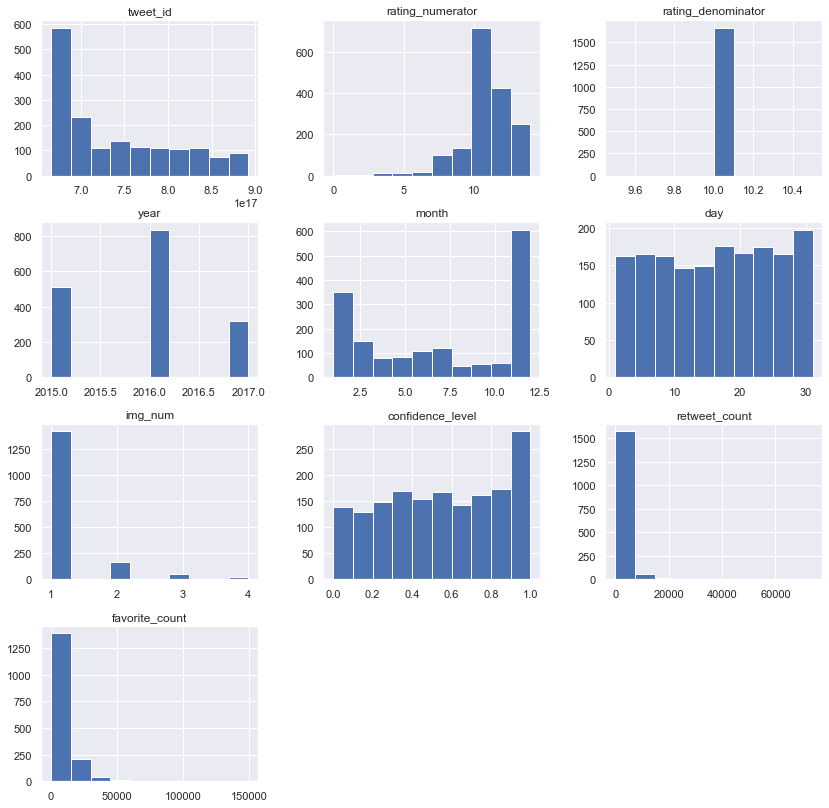

In [86]:
df.hist(figsize = (14,14));

From above histogram, we can observe that: 

1. Year 2016 has the highest Tweets on WeRateDog, compared to year 2017 and 2015. 
2. Furthermore, most of the tweets are posted in December. 
3. Most of the tweets have only one image. 
4. The prediction for the dog breed has accuracy of 100% for over 250 tweets. 

##### We would like to find out: 

1. The top 10 dog breed rated in Twitter. 
2. Which dog stage has the highest average rating, retweet count and favorite count? 
3. How good the neural network is for the image prediction? 
4. Which jpg_url has the highest favorite count/retweet count?

##### Insight 1 : The top 10 dog breed rated in Twitter.

In [87]:
top_10_dog_breed = df.dog_breed.value_counts()[:10]
top_10_dog_breed

golden_retriever      154
labrador_retriever    105
pembroke               95
chihuahua              90
pug                    62
toy_poodle             51
chow                   47
samoyed                42
pomeranian             41
malamute               33
Name: dog_breed, dtype: int64

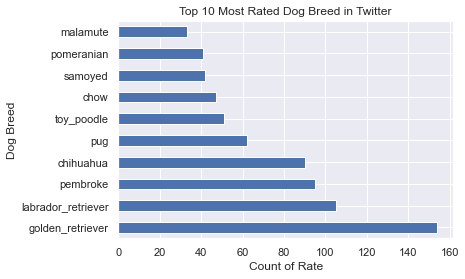

In [88]:
#plot bar graph 

plt.figure(figsize=(6,4))
graph = top_10_dog_breed.plot(kind = 'barh')
plt.title('Top 10 Most Rated Dog Breed in Twitter')
plt.xlabel('Count of Rate')
plt.ylabel('Dog Breed');

##### Insight 2 : Which dog stage has the highest retweet count and favorite count?

In [89]:
retweet_count = df.groupby('dog_stage').retweet_count.sum()
retweet_count

dog_stage
doggo             329031.0
doggo, floofer      2916.0
doggo, pupper      30156.0
doggo, puppo       16684.0
floofer            28999.0
pupper            341154.0
puppo             114963.0
Name: retweet_count, dtype: float64

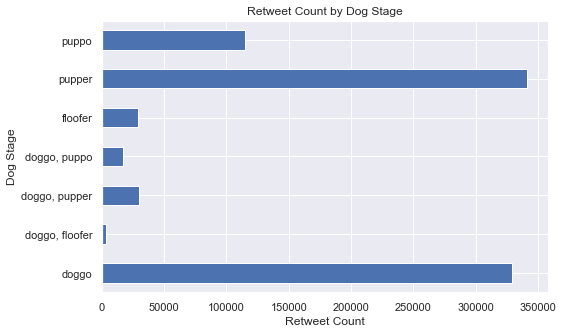

In [90]:
#plot bar graph

plt.figure(figsize=(8,5))
graph = retweet_count.plot(kind = 'barh')
plt.title('Retweet Count by Dog Stage')
plt.xlabel('Retweet Count')
plt.ylabel('Dog Stage');

In [91]:
favorite_count = df.groupby('dog_stage').favorite_count.sum()
favorite_count

dog_stage
doggo              975836.0
doggo, floofer      15322.0
doggo, pupper      104095.0
doggo, puppo        43117.0
floofer             81139.0
pupper            1121113.0
puppo              423046.0
Name: favorite_count, dtype: float64

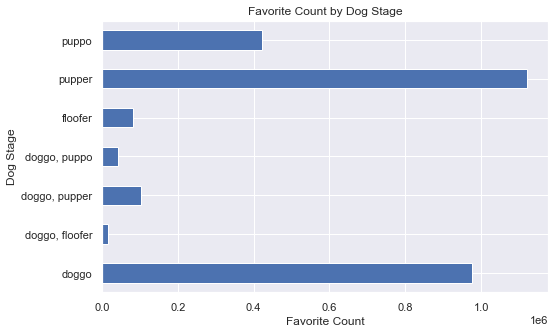

In [92]:
#plot bar graph

plt.figure(figsize=(8,5))
graph = favorite_count.plot(kind = 'barh')
plt.title('Favorite Count by Dog Stage')
plt.xlabel('Favorite Count')
plt.ylabel('Dog Stage');

##### Insight 3 : How good the neural network is for the image prediction?  

In [93]:
confidence_level = df.groupby('dog_breed').confidence_level.mean()
confidence_level.nlargest(10)

dog_breed
komondor                   0.972531
keeshond                   0.844431
bull_mastiff               0.815618
brittany_spaniel           0.775591
bernese_mountain_dog       0.766685
samoyed                    0.717440
blenheim_spaniel           0.699588
german_shepherd            0.694426
black-and-tan_coonhound    0.692000
pomeranian                 0.691647
Name: confidence_level, dtype: float64

In [94]:
confidence_level.nsmallest(10)

dog_breed
irish_wolfhound         0.063078
bouvier_des_flandres    0.082610
scottish_deerhound      0.143519
norwich_terrier         0.246893
cairn                   0.262196
scotch_terrier          0.267979
standard_poodle         0.272770
bedlington_terrier      0.286043
mexican_hairless        0.300638
groenendael             0.302625
Name: confidence_level, dtype: float64

##### Insight 4 : Which jpg_url has the highest favorite count/retweet count? 

In [95]:
max_fav_count = df['favorite_count'].idxmax()
max_details = pd.DataFrame(df.loc[max_fav_count])
max_details

,686
tweet_id,744234799360020481
text,Here's a doggo realizing you can stand in a po...
rating_numerator,13.0
rating_denominator,10.0
name,None
year,2016
month,6
day,18
dog_stage,doggo
jpg_url,https://pbs.twimg.com/ext_tw_video_thumb/74423...


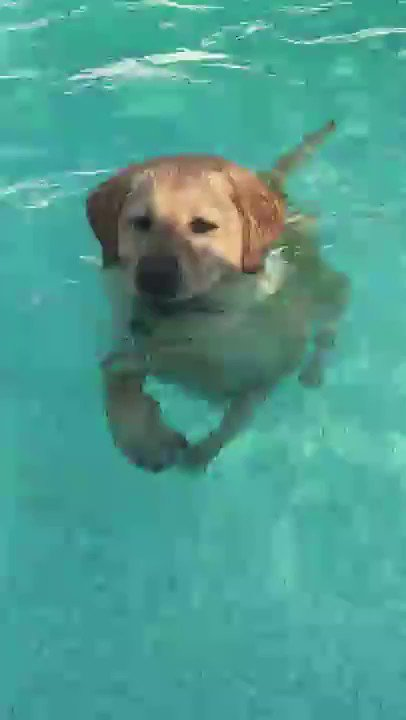

In [96]:
max_fav_count = df['favorite_count'].idxmax()
Image(df.loc[max_fav_count].jpg_url)

In [97]:
max_retweet_count = df['retweet_count'].idxmax()
max_details1 = pd.DataFrame(df.loc[max_retweet_count])
max_details1

,686
tweet_id,744234799360020481
text,Here's a doggo realizing you can stand in a po...
rating_numerator,13.0
rating_denominator,10.0
name,None
year,2016
month,6
day,18
dog_stage,doggo
jpg_url,https://pbs.twimg.com/ext_tw_video_thumb/74423...


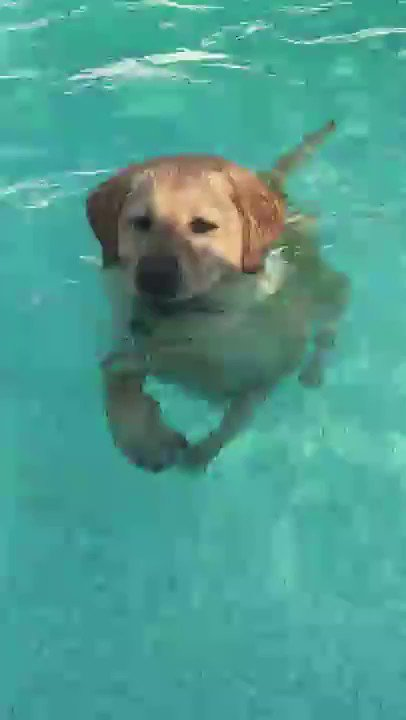

In [98]:
max_retweet_count = df['retweet_count'].idxmax()
Image(df.loc[max_retweet_count].jpg_url)

In [99]:
df.loc[max_retweet_count].text

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"